In [1]:
import pandas as pd
import numpy as np
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import pickle
## Stats on Output and Citation

# Load and clean the output file
aujour_or = pd.read_csv("2010AJR.csv")

aujour_or = aujour_or.drop(aujour_or.columns[[0]], axis=1)
aujour_or = aujour_or.drop(aujour_or.columns[[range(2,8)]], axis=1)

# Normalise the ISSN numbersimport pandas as pd
aujour_or = aujour_or.rename(columns = {"Title":"VolumeTitle"})
aujour_or["ISSN1"] = aujour_or.ISSN1.str.replace('X', '')
aujour_or["ISSN2"] = aujour_or.ISSN2.str.replace('X', '')
aujour_or["ISSN3"] = aujour_or.ISSN3.str.replace('X', '')
aujour_or["ISSN4"] = aujour_or.ISSN4.str.replace('X', '')
aujour_or["ISSN1"] = aujour_or.ISSN1.str.replace('-', '')
aujour_or["ISSN2"] = aujour_or.ISSN2.str.replace('-', '')
aujour_or["ISSN3"] = aujour_or.ISSN3.str.replace('-', '')
aujour_or["ISSN4"] = aujour_or.ISSN4.str.replace('-', '')
aujour_or

,Rank,VolumeTitle,ISSN1,ISSN2,ISSN3,ISSN4
0,C,1913: a journal of forms,15489914,NaN,NaN,NaN
1,B,3CMedia,18326161,1445971,NaN,NaN
2,C,4OR: A Quarterly Journal of Operations Research,16194500,03908127,NaN,NaN
3,C,A St A: Advances in Statistical Analysis,18638171,1863818,00026018,NaN
4,A,AA files: annals of the Architectural Associat...,02616823,NaN,NaN,NaN
5,B,AACE International Transactions,15287106,NaN,NaN,NaN
6,B,AACE Journal,15513696,NaN,NaN,NaN
7,C,AACN Advanced Critical Care,15597768,15597776,10790713,NaN
8,C,AANA Journal,00946354,NaN,NaN,NaN
9,C,AAOHN Journal,08910162,NaN,NaN,NaN


In [2]:
# Load the journal names from the UOA and their ISSNs
refcs_or = pd.read_csv("REF2014Data_output.csv")

# Clean the data
refcs_or = refcs_or.drop(refcs_or.columns[[range(1,8)]], axis=1)
refcs_or = refcs_or.drop(refcs_or.columns[[range(2,7)]], axis=1)
refcs_or = refcs_or.drop(refcs_or.columns[3::], axis=1)
refcs_or["ISSN"] = refcs_or.ISSN.str.replace('X', '')
refcs_or["ISSN"] = refcs_or.ISSN.str.replace('-', '')

refcs_or

,UKPRN,VolumeTitle,ISSN
0,10007850,Optics Letters,01469592
1,10007850,Optics Express,10944087
2,10007850,Physical Review Letters,00319007
3,10007850,Physical Review Letters,00319007
4,10007850,Physical Review Letters,00319007
5,10007850,Physical Review Letters,00319007
6,10007850,Nature Photonics,17494885
7,10007850,Optics Express,10944087
8,10007850,Optics Express,10944087
9,10007850,Optics Express,10944087


In [3]:
# create a dictionary of indexed ISSNs
ref = {}
for index, row in refcs_or.iterrows():
    indexs = index
    ref[index] = row["ISSN"]
ref.get(7647)

In [4]:
# Retrieve all the ISSNs from the Australian journals into one ISSN column
ajourone = {}
for index, row in aujour_or.iterrows():
    ajourone[row["ISSN1"]] = row["Rank"]


In [5]:
ajourtwo = {}
for index, row in aujour_or.iterrows():
    ajourtwo[row["ISSN2"]] = row["Rank"]

len(ajourtwo)

11416

In [6]:
ajourthree = {}
for index, row in aujour_or.iterrows():
    ajourthree[row["ISSN3"]] = row["Rank"]


In [7]:
ajourfour = {}
for index, row in aujour_or.iterrows():
    ajourfour[row["ISSN4"]] = row["Rank"]


In [8]:
# Merge Australian journal ranks with UOA data by ISSN
ranklistone = {}

for index in ref:
    for issn in ajourone:
        if issn == ref[index]:
            ranklistone[index] = ajourone[issn]

In [9]:
ranklisttwo = {}

for index in ref:
    for issn in ajourtwo:
        if issn == ref[index]:
            ranklisttwo[index] = ajourtwo[issn]

In [10]:
ranklistthree = {}

for index in ref:
    for issn in ajourthree:
        if issn == ref[index]:
            ranklistthree[index] = ajourthree[issn]

In [11]:
ranklistfour= {}

for index in ref:
    for issn in ajourfour:
        if issn == ref[index]:
            ranklistfour[index] = ajourfour[issn]

In [12]:
ref_rankd = refcs_or
ref_rankd["Rank1"] = pd.Series(ranklistone)
ref_rankd["Rank2"] = pd.Series(ranklisttwo)
ref_rankd["Rank3"] = pd.Series(ranklistthree)
ref_rankd["Rank4"] = pd.Series(ranklistfour)


ref_rankd.loc[ref_rankd['Rank1'].isnull(),'Rank1'] = ref_rankd['Rank2']
ref_rankd.loc[ref_rankd['Rank1'].isnull(),'Rank1'] = ref_rankd['Rank3']
ref_rankd.loc[ref_rankd['Rank1'].isnull(),'Rank1'] = ref_rankd['Rank4']

ref_rankd = ref_rankd.drop(["Rank2", "Rank3", "Rank4"], axis = 1)

count_nan = len(ref_rankd) - ref_rankd.count()

refranking = ref_rankd

ref_rankd



,UKPRN,VolumeTitle,ISSN,Rank1
0,10007850,Optics Letters,01469592,A*
1,10007850,Optics Express,10944087,A*
2,10007850,Physical Review Letters,00319007,A*
3,10007850,Physical Review Letters,00319007,A*
4,10007850,Physical Review Letters,00319007,A*
5,10007850,Physical Review Letters,00319007,A*
6,10007850,Nature Photonics,17494885,A*
7,10007850,Optics Express,10944087,A*
8,10007850,Optics Express,10944087,A*
9,10007850,Optics Express,10944087,A*


In [13]:
# Assign a score to the ranks
ref_rankd = ref_rankd.replace("A*", 1)
ref_rankd = ref_rankd.replace("A", 0.5)
ref_rankd = ref_rankd.replace("B", -5)
ref_rankd = ref_rankd.replace("C", -10)
ref_rankd = ref_rankd.replace("Not ranked", 0)
ref_rankd

,UKPRN,VolumeTitle,ISSN,Rank1
0,10007850,Optics Letters,01469592,1.0
1,10007850,Optics Express,10944087,1.0
2,10007850,Physical Review Letters,00319007,1.0
3,10007850,Physical Review Letters,00319007,1.0
4,10007850,Physical Review Letters,00319007,1.0
5,10007850,Physical Review Letters,00319007,1.0
6,10007850,Nature Photonics,17494885,1.0
7,10007850,Optics Express,10944087,1.0
8,10007850,Optics Express,10944087,1.0
9,10007850,Optics Express,10944087,1.0


In [14]:
## Find the average ranks to fill the nans with the mean ranks for each uni
sum_rank = {}
len_rank = {}

rref = ref_rankd.dropna()

#for index, rows in av_rankd.iterrows():

for index, rows in rref.iterrows():
    if rows["UKPRN"] not in len_rank:
        len_rank[rows["UKPRN"]] = 1
    else:
        len_rank[rows["UKPRN"]] += 1
        
for index, rows in rref.iterrows():    
    if rows["UKPRN"] not in sum_rank:
        sum_rank[rows["UKPRN"]] = rows["Rank1"]
    else:
        sum_rank[rows["UKPRN"]] += rows["Rank1"]
        
av_rank = {}

for univd in len_rank:
    for univid in sum_rank:
        if univd == univid:
            av_rank[univd] = sum_rank[univd] / len_rank[univid]


In [15]:


indexlist = list()
rankinglist = list()

for index, row in ref_rankd.iterrows():
    for uniid in av_rank:
        if uniid == row["UKPRN"]:
            indexlist.append(uniid)
            rankinglist.append(av_rank[uniid])


In [16]:
ref_rankd["Rank1"] = pd.Series(rankinglist)

In [17]:
## This is the normalised ref_rankd
#ref_rankd = ref_rankd.drop(["Rank1"], axis = 1)

ref_rankd

,UKPRN,VolumeTitle,ISSN,Rank1
0,10007850,Optics Letters,01469592,0.766234
1,10007850,Optics Express,10944087,0.766234
2,10007850,Physical Review Letters,00319007,0.766234
3,10007850,Physical Review Letters,00319007,0.766234
4,10007850,Physical Review Letters,00319007,0.766234
5,10007850,Physical Review Letters,00319007,0.766234
6,10007850,Nature Photonics,17494885,0.766234
7,10007850,Optics Express,10944087,0.766234
8,10007850,Optics Express,10944087,0.766234
9,10007850,Optics Express,10944087,0.766234


In [18]:
## Now to create a dictionary with the average ranking per uni
unijourank = dict(zip(indexlist,rankinglist))

#with open("univ_journrank_physics.pkl", 'wb') as handle:
 #   pickle.dump(unijourank, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [19]:
## Now to add the four star rating
fourstr = pd.read_csv("REF2014Data_submissionprofile.csv")



fourstr = fourstr[fourstr["Profile"].str.contains("Outputs")]
fourstr = fourstr.drop(fourstr.columns[[1,2,3,5,6,7,8]], axis=1)

fourstrdic = {}

for index, row in fourstr.iterrows():
    fourstrdic[row["UKPRN"]] = row["FourStar"]
    
#with open("univ_fourstr_physics.pkl", 'wb') as handle:
 #   pickle.dump(fourstrdic, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [20]:
rankfour = {}

for uni in fourstrdic:
    for unis in unijourank:
        if unis == uni:
            rankfour[unijourank[unis]] = fourstrdic[uni]

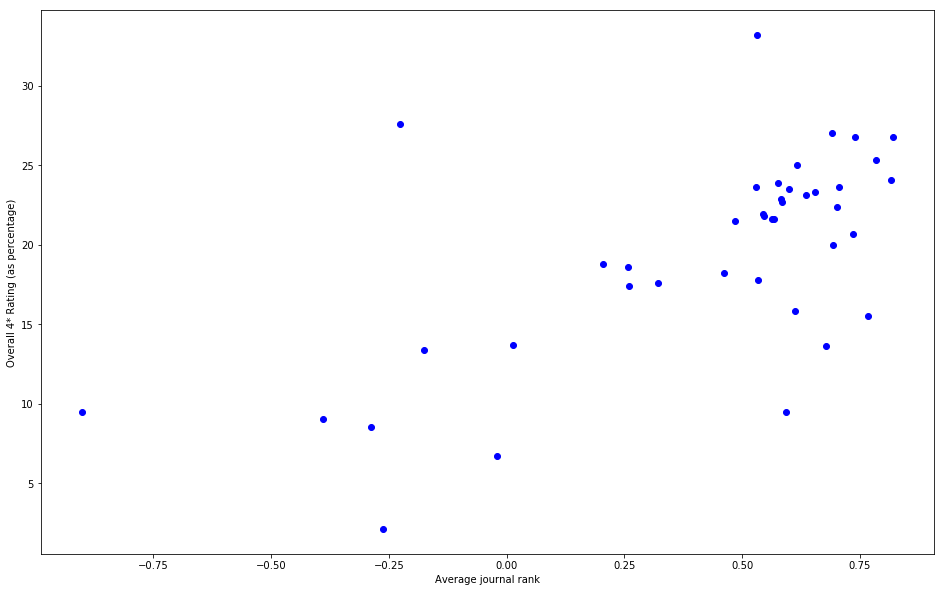

In [21]:
import matplotlib.pylab as plt
%matplotlib inline

lists = sorted(rankfour.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.figure(figsize = [16,10])
plt.plot(x, y, "bo")
plt.xlabel("Average journal rank")
plt.ylabel("Overall 4* Rating (as percentage)")

#plt.savefig("jpeg")


In [22]:
from scipy.stats.stats import pearsonr

pearsonr(x,y)

(0.63609930585786656, 7.8363539581725517e-06)

In [23]:
########### FUTHER ANALYSIS TO CLARIFY RESULTS ###############

totastar = {}
tota = {}
totb = {}
totc = {}

for index,row in refranking.iterrows():
    if row["Rank1"] == "A*":
        if row["UKPRN"] not in totastar:
            totastar[row["UKPRN"]] = 1
        else:
            totastar[row["UKPRN"]] += 1
    else:
        if row["UKPRN"] not in totastar:
            totastar[row["UKPRN"]] = 0
            
    if row["Rank1"] == "A":
        if row["UKPRN"] not in tota:
            tota[row["UKPRN"]] = 1
        else:
            tota[row["UKPRN"]] += 1
    else:
        if row["UKPRN"] not in tota:
            tota[row["UKPRN"]] = 0
            
    if row["Rank1"] == "B":
        if row["UKPRN"] not in totb:
            totb[row["UKPRN"]] = 1
        else:
            totb[row["UKPRN"]] += 1
    else:
        if row["UKPRN"] not in totb:
            totb[row["UKPRN"]] = 0
            
    if row["Rank1"] == "C":
        if row["UKPRN"] not in totc:
            totc[row["UKPRN"]] = 1
        else:
            totc[row["UKPRN"]] += 1
    else:
        if row["UKPRN"] not in totc:
            totc[row["UKPRN"]] = 0

In [24]:
dataframe  = pd.DataFrame.from_dict(totastar, orient = "index")

In [25]:
dataframe = dataframe.rename(columns = {0:"A*"})

In [26]:
totalist = tuple(tota.items())
totblist = tuple(totb.items())
totclist = tuple(totc.items())
totuni = tuple(unijourank.items())
unifour = tuple(fourstrdic.items())

x, totalisty = zip(*totalist)
x, totblisty = zip(*totblist)
x, totclisty = zip(*totclist)
x, totuniy = zip(*totuni)
x, unifoury = zip(*unifour)

In [27]:
dataframe["A"] = pd.Series(totalisty).values
dataframe["B"] = pd.Series(totblisty).values
dataframe["C"] = pd.Series(totclisty).values
dataframe["Av. Rank"] = pd.Series(totuniy).values
dataframe["Four Str"] = pd.Series(unifoury).values



In [28]:

dataframe = dataframe.rename(columns = {0:"A*"})
dataframe.to_csv("General Stats.csv")

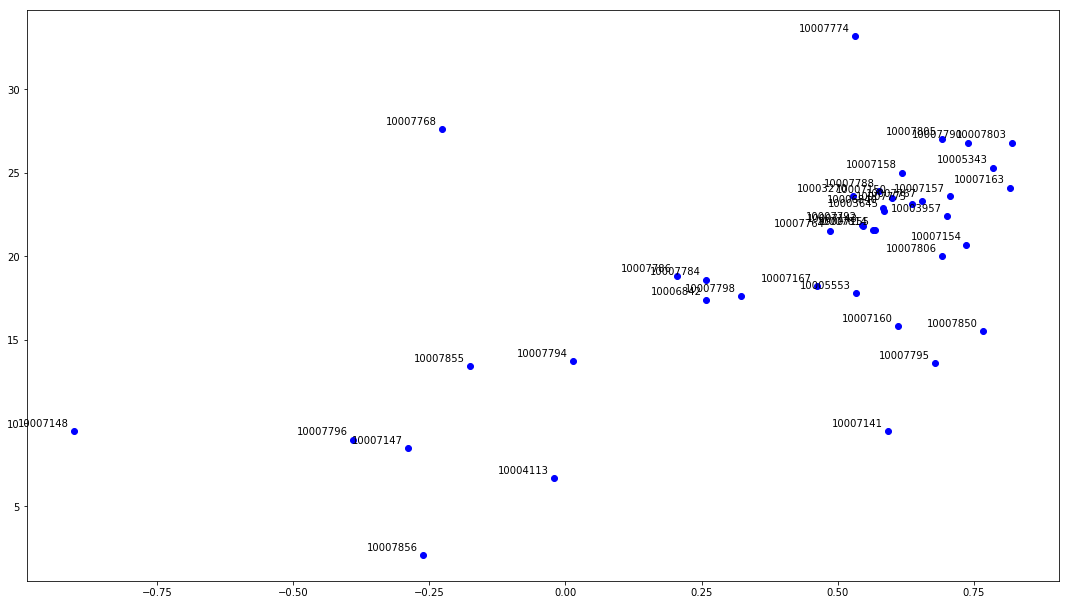

In [29]:

x = dataframe["Av. Rank"] 
y = dataframe["Four Str"]
z = dataframe.index

fig, ax = plt.subplots()
ax.plot(x, y, 'bo')
fig.set_size_inches(18.5, 10.5)

for X, Y, Z in zip(x, y, z):
    # Annotate the points 5 _points_ above and to the left of the vertex
    ax.annotate('{}'.format(Z), xy=(X,Y), xytext=(-5, 5), ha='right',
                textcoords='offset points')

plt.show()

In [31]:
dataframe = dataframe.sort_values("Av. Rank")

dataframe
#dataframe.to_csv("General Stats.csv")

,A*,A,B,C,Av. Rank,Four Str
10007148,13,20,4,4,-0.902439,9.5
10007796,80,81,21,9,-0.390052,9.0
10007147,29,81,5,8,-0.288618,8.5
10007856,21,16,2,3,-0.261905,2.1
10007768,84,33,0,13,-0.226923,27.6
10007855,29,44,1,6,-0.175000,13.4
10004113,34,29,8,1,-0.020833,6.7
10007794,73,58,20,0,0.013245,13.7
10007786,96,59,18,0,0.204023,18.8
10007784,235,157,15,13,0.258333,18.6


In [35]:
tot_astar = dataframe["A*"].sum()
tot_a = dataframe["A"].sum()
tot_b = dataframe["B"].sum()
tot_c = dataframe["C"].sum()

In [36]:
print(tot_astar, tot_a, tot_b, tot_c)

3267 2323 217 74
